![](Bilder/MBILogo.png)

# FP O4: Fourier-Transform Holography
## _Simulation part_

This notebook is used for simulating a Fourier-transform holography experiment. The whole (virtual) experiment is executed in the notebook and all documentation, analysis and discussion should be left here. In the end, you can generate a pdf from this notebook and hand it in as experimental report. Use these text boxes and [Markdown formatting](https://de.wikipedia.org/wiki/Markdown) to produce your text. If you prefer, you can change the language of this document to German.

## Important: File saving

This binder session uses a local copy of all data. Once the binder session is terminated or receives a time out, all local data will be _irrevocably lost._ To save you data, open a terminal in the main jupyter window (`new` → `terminal`) and run `./git.sh`using the credientials provided.

## Import Libraries

This needs to be executed once in the beginning when you start the kernel on which the notebook operates. The libaries loaded include functions for numerical operations, scientific plotting and image manipulation.

In [1]:
# NumPy – The fundamental package for scientific computing with Python
# https://numpy.org/
import numpy as np

# Matplotlib – Visualization with Python
# https://matplotlib.org/
#for interactive plots
%matplotlib notebook 
#When exporting to pdf rplace the "notebook" with "inline" and replot every plot.
#This replaces the interactive plots with regular ones that can be converted with LaTeX.
import matplotlib.pyplot as plt

# SciPy – Python-based ecosystem of open-source software for mathematics, science, and engineering
# https://www.scipy.org/
from PIL import Image

## Load the Data

The objects are represented by binary image files. You can concieve this image as the amplitude of the electromagnetic wave in the plane after it has passed an aperture shaped like this image. In this simulation, we consider the phase to be constant (zero) everywhere. 

Please specify the **entire file path and the file name**. Every time you want to analyze a new virtual object, you have to load the image file here and then execute every step. We recomment to either copy the code for each object or to create a new file (`File` → `Make a copy`).

Replace `file` by the following file names for the objects:
1. Sim_1_ohne_Ref.tif
2. Sim_2_eine_Ref.tif
3. Sim_3_multi_Ref.tif
4. Sim_4_multi_Obj.tif

In [2]:
file = r"Sim_1_ohne_Ref.tif" #The file has to be in the same folder as this script.
your_folder = r'\\' #The folder where you want to save your data in. Make sure that the folder exists.
prefix = '' #This string will be added in front of your saved image. Choose it according to your current simulation.

image = Image.open(file)
# convert image to grayscale
image = image.convert('L')
# change data type to float and rescale intensity to 0 to 1.
image = np.asarray(image.getdata(),dtype=np.float64).reshape((image.size[1],image.size[0]))/255

### Plot the object

<IPython.core.display.Javascript object>


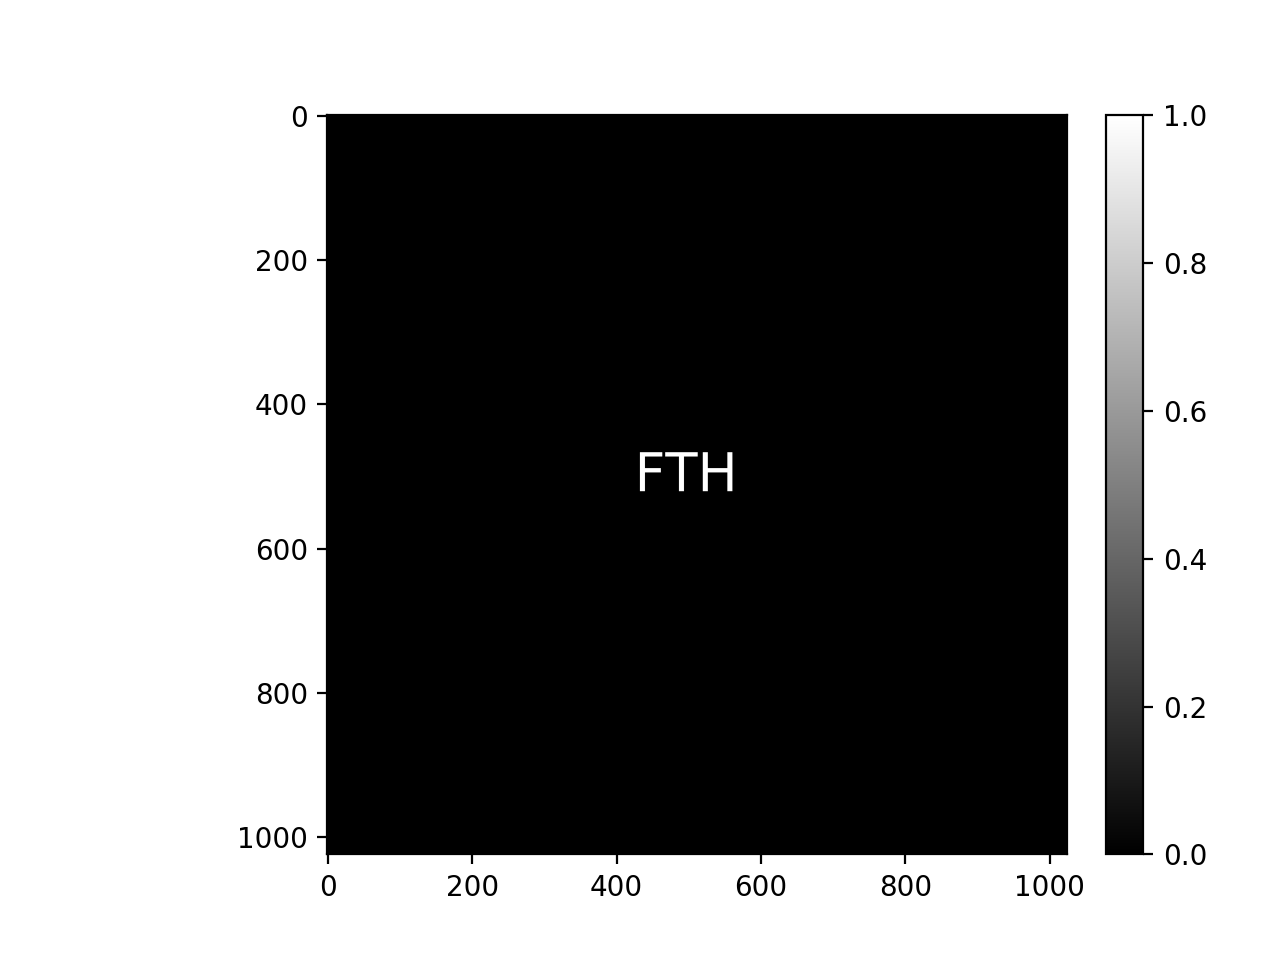

In [13]:
fig, ax = plt.subplots()
ax = plt.imshow(image, cmap = 'gray')
fig.colorbar(ax, fraction=0.046, pad=0.04)

## Fourier Transformation – Propagate to far field

The wave field is propagated into the far field based on the Fraunhofer approximation which states that the far-field diffraction pattern of an object is basically given by the Fourier transformation (FT) of the object. We omit some additional phase terms here (why can we do this?). As our virtual detector only detects intensity, we calculate the magnitude squared of the FT. The numerical fast Fourier transformation function (fft2) expects the center of the coordinate system to be located in pixel (0,0) which counterintuitive to the typical detector position in the experiment where the beam is centered on the chip, i.e. the center is located at pixel (n/2,n/2). The fftshift function translates between the two representations.

In [14]:
hologram = np.abs(np.fft.fftshift(np.fft.fft2(image)))**2

### Plot the image

Plot the diffraction pattern, i.e. the Fourier transformation on lineear intensity scale (with limits) and as logarithmic plot.

You can adjust the scale of the linear intensity scale by specifying the mininal (*vmin*) and maximal (*max*) displayed value. You can do this with choosing the percentiles in the first line but you can also type in any number you like.

<IPython.core.display.Javascript object>


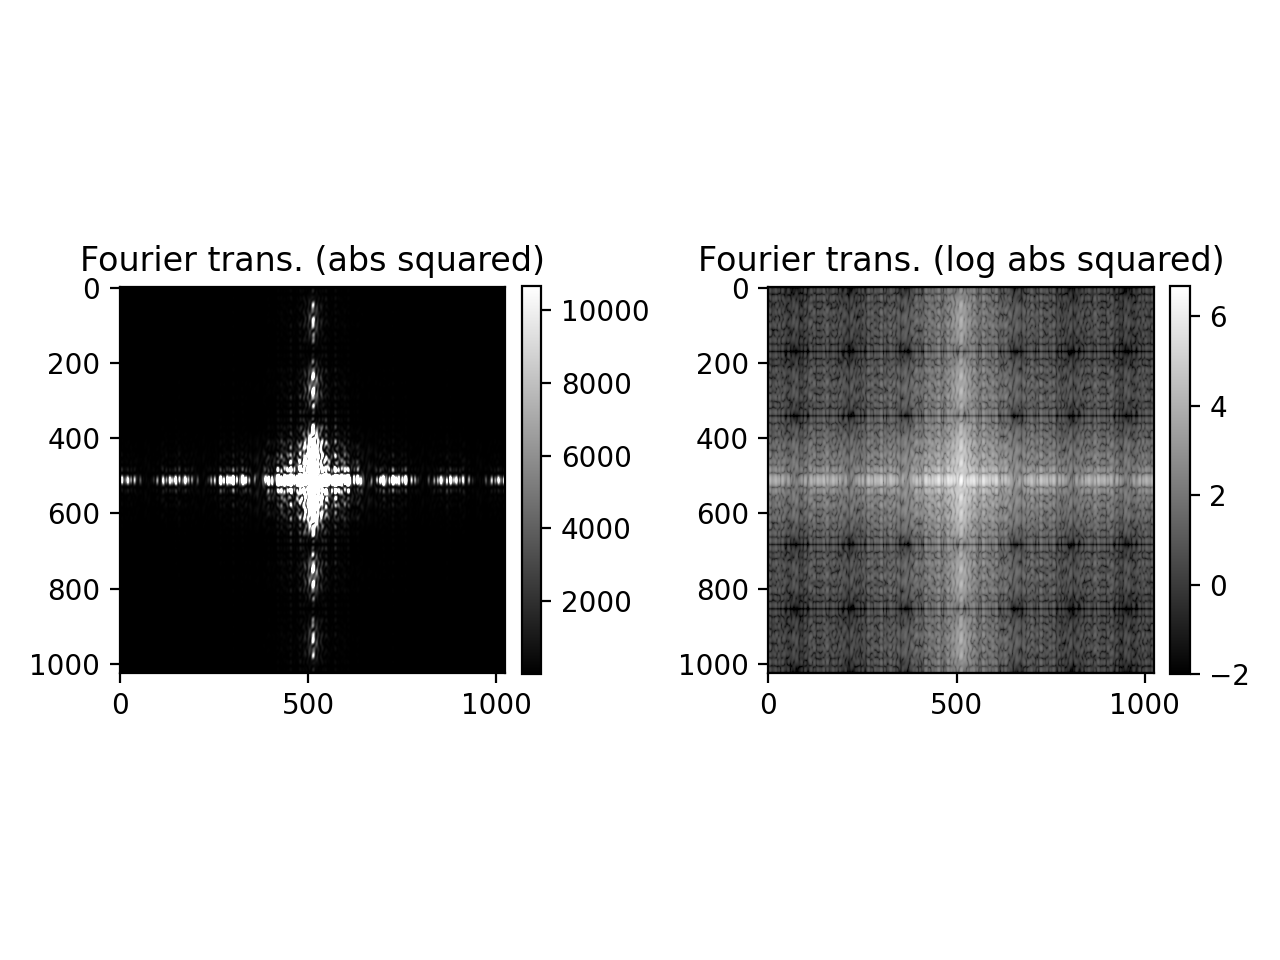

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [15]:
MinV, MaxV = np.percentile(hologram,(2,98))

fig, axs = plt.subplots(1,2)

ax1 = axs[0].imshow(hologram, cmap = 'gray', vmin = MinV, vmax = MaxV)
fig.colorbar(ax1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Fourier trans. (abs squared)')

ax2 = axs[1].imshow(np.log10(hologram), cmap = 'gray', vmin=-2)
fig.colorbar(ax2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('Fourier trans. (log abs squared)')

fig.tight_layout()

#save image and data
plt.savefig(your_folder + prefix + 'holo.png')
np.save(your_folder + prefix + 'holo', hologram) #saves as numpy array. can be opened in another notebook with np.load('filepath')

# Reconstruct

Now the artificial hologram is reconstructed. This is the only step that you will execute with the experimental data.

In [6]:
recon = np.abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(hologram)))) 

## Plot the image

As before...

<IPython.core.display.Javascript object>


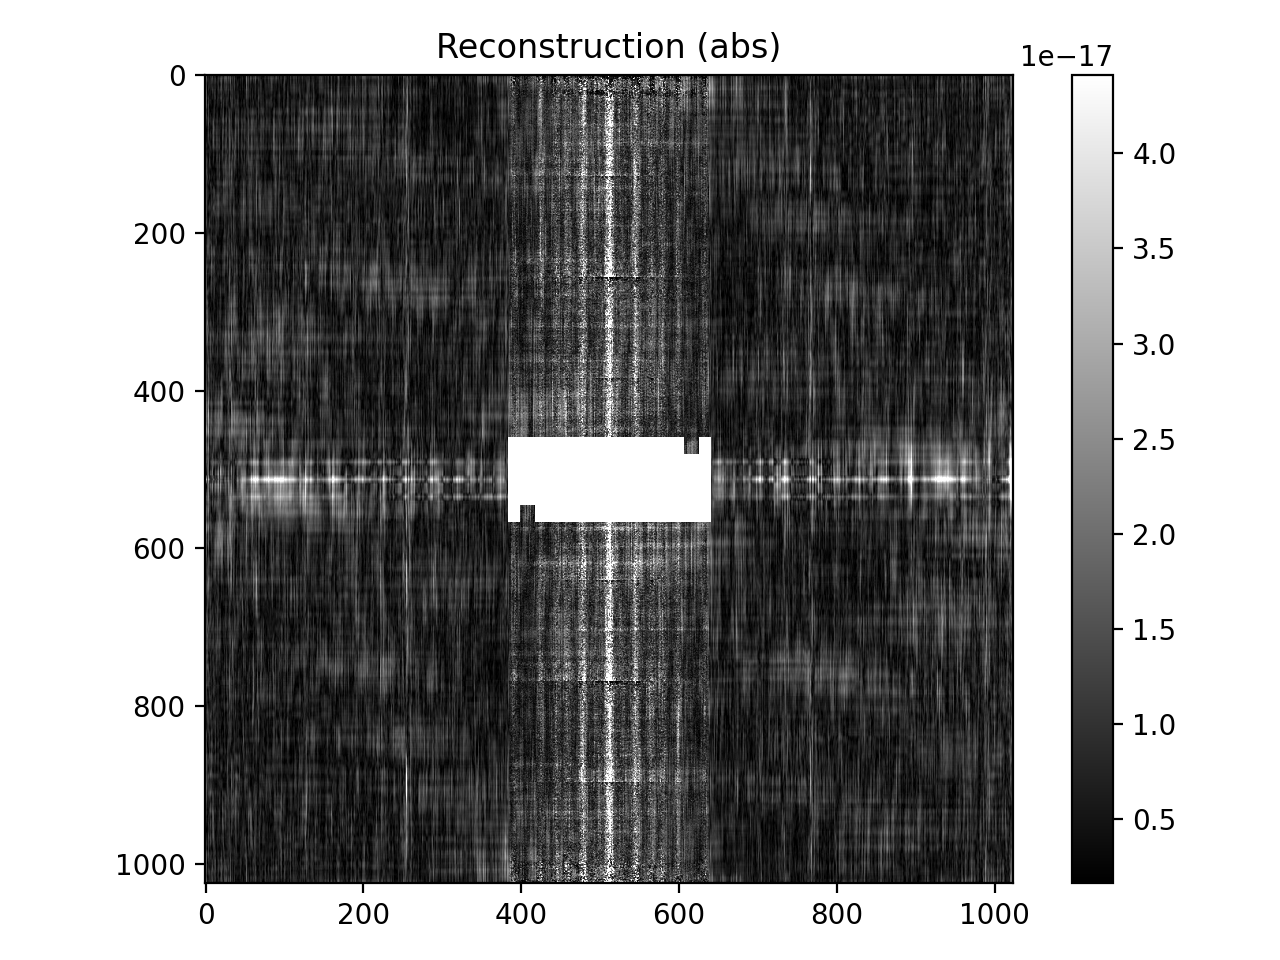

In [7]:
MinV, MaxV = np.percentile(recon,(3,97))

fig, ax = plt.subplots()

ax = plt.imshow(recon, cmap = 'gray', vmin = MinV, vmax = MaxV)
plt.colorbar()
plt.title('Reconstruction (abs)')

fig.tight_layout()

#save image and data
plt.savefig(your_folder + prefix + 'recon.png')
np.save(your_folder + prefix + 'recon', recon) #saves as numpy array. can be opened in another notebook with np.load('filepath')

## Lineout

Do reasonable intensity lineouts to determine the resolution using the 90%-10% criterion.

You can determine the pixelpositions by using the cursor over your image. You can also select an area of the image to enlarge it using the butten left of the floppy disc.

In [ ]:
def lineout(image, startX, endX, startY, endY, file_prefix):
    lineout = np.sum(image[startY:endY, startX:endX], 0)
    
    #plot the lineout
    fig, ax = plt.subplots()
    ax = plt.plot(lineout)
    plt.title("Lineout for resultion")
    plt.xlabel("Pixel")
    plt.ylabel("Intensity [a.u.]")
    
    #save the lineout
    np.savetxt(your_folder + file_prefix + 'lineout.txt', lineout)
    return

In [ ]:
lineout(image=recon, startX = 380, endX = 490, startY = 398, endY = 399, file_prefix=prefix)

If you want to load an existing txt-file of a lineout, you can do this here

In [ ]:
line = np.fromfile(your_folder + 'Sim_3_lineout3.txt', dtype=np.float, sep='\n')

In [ ]:
fig, ax = plt.subplots()
ax.plot(line)

# High Pass Filter

A binary mask will be multiplied to the hologram.

You can set the radius (in pixels) of this mask in the first cell.

In [ ]:
radius = 50

dim_x, dim_y = hologram.shape

xx, yy = np.meshgrid(np.arange(1, hologram.shape[0]+1,1),
                     np.arange(1, hologram.shape[1]+1,1), sparse=True)
#create the mask by setting everything in the radius 0, else 1
mask_HP = np.where((xx-dim_x/2)**2+(yy-dim_y/2)**2<radius**2,0,1)

#muliply mask and holo
holo_HP = mask*hologram

In [ ]:
MinV, MaxV = np.percentile(holo_HP,(2,98))

fig, axs = plt.subplots(1,2)

ax1 = axs[0].imshow(holo_HP, cmap = 'gray', vmin = MinV, vmax = MaxV)
fig.colorbar(ax1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('High Pass Hologram')

ax2 = axs[1].imshow(mask_HP, cmap = 'gray')
fig.colorbar(ax2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('High Pass Mask')

fig.tight_layout()

#save image and data
plt.savefig(your_folder + 'holo_HP.png')
np.save(your_folder + 'holo_HP', holo_HP) #saves as numpy array. can be opened in another notebook with np.load('filepath')

## Reconstruct

In [ ]:
recon_HP = np.abs(np.fft.ifftshift(np.fft.fft2(np.fft.ifftshift(holo_HP))))

In [ ]:
MinV, MaxV = np.percentile(recon_HP,(3, 97))

fig, ax = plt.subplots()

ax = plt.imshow(recon_HP, cmap = 'gray', vmin = MinV, vmax = MaxV)
plt.colorbar()
plt.title('Reconstruction High Pass (abs)')

fig.tight_layout()

#save image and data
plt.savefig(your_folder + 'recon_HP.png')
np.save(your_folder + 'recon_HP', recon_HP) #saves as numpy array. can be opened in another notebook with np.load('filepath')

## Lineout

In [ ]:
lineout(image=recon_HP, startX = 170, endX = 230, startY = 508, endY = 509, file_suffix='_HP')

# Low Pass Filter

A binary mask will be multiplied to the hologram.

You can set the radius (in pixels) of this mask in the first cell

In [ ]:
radius = 100

dim_x, dim_y = hologram.shape

xx, yy = np.meshgrid(np.arange(1, hologram.shape[0]+1, 1),
                     np.arange(1, hologram.shape[1]+1, 1), sparse=True)
#create the mask by setting everything in the radius 1, else 0
mask_LP = np.where((xx-dim_x/2)**2+(yy-dim_y/2)**2<radius**2, 1, 0)

#muliply mask and holo
holo_LP = mask_LP * hologram

In [ ]:
MinV, MaxV = np.percentile(holo_LP,(2,98))

fig, axs = plt.subplots(1,2)

ax1 = axs[0].imshow(holo_LP, cmap = 'gray', vmin = MinV, vmax = MaxV)
fig.colorbar(ax1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Low Pass Hologram')

ax2 = axs[1].imshow(mask_LP, cmap = 'gray')
fig.colorbar(ax2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('Low Pass Mask')

fig.tight_layout()

#save image and data
plt.savefig(your_folder + 'holo_HP.png')
np.save(your_folder + 'holo_HP', holo_LP) #saves as numpy array. can be opened in another notebook with np.load('filepath')

## Reconstruct

In [ ]:
recon_LP = np.abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(holo_LP))))

In [ ]:
MinV, MaxV = np.percentile(recon_LP,(2.5, 97.5))

fig, ax = plt.subplots()

ax = plt.imshow(recon_LP, cmap = 'gray', vmin = MinV, vmax = MaxV)
plt.colorbar()
plt.title('Reconstruction Low Pass (abs)')

fig.tight_layout()

#save image and data
plt.savefig(your_folder + 'recon_LP.png')
np.save(your_folder + 'recon_LP', recon_LP) #saves as numpy array. can be opened in another notebook with np.load('filepath')

## Lineout

In [ ]:
lineout(image=recon_LP, startX = 170, endX = 230, startY = 508, endY = 509, file_suffix='_LP')